### Project -Extract Dominant Color


![](k_meanspro.png)
![](kmean.jpeg)

In [56]:
import cv2      # importing opencv
import matplotlib.pyplot as plt  # importing matplotlib library
import pandas as pd    # import pandas library
import numpy as np     # import numpy library

In [57]:
im = cv2.imread('/home/abheeshth/Downloads/catwoman.jpg')  #read the image
im  = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)

(1080, 1920, 3)


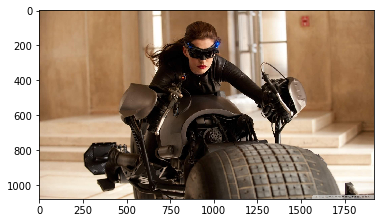

In [58]:
plt.imshow(im)    # using matplotlib for showing image
original_shape = im.shape
plt.show()

In [59]:
# FLATTEN EACH CHANNEL OF THE IMAGE
all_pixels = im.reshape((-1,3))    # reshape every channel in (1080*1920,3)
print(all_pixels.shape)     #

(2073600, 3)


In [60]:
from sklearn.cluster import KMeans

In [61]:
dominant_colors = 4      # let's take four most dominant color
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [62]:
centers = km.cluster_centers_   
print(centers)    # these are the RGB values of most dominant colors

[[ 28.36513731  18.87197803  13.1223357 ]
 [118.12010468  88.16130566  63.8531651 ]
 [231.24202501 213.32745812 193.03866269]
 [171.99577836 134.69140116  99.7391277 ]]


In [63]:
centers = np.array(centers,dtype='uint8')  # to represent these no.s we convert it into 8bit integers
print(centers)

[[ 28  18  13]
 [118  88  63]
 [231 213 193]
 [171 134  99]]


### Plot all these colors 


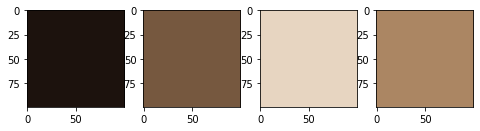

In [64]:
# here we plot four boxes of most dominant colors
i = 1
plt.figure(0,figsize = (8,8))

colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    i+=1
    
    colors.append(each_col)
    
    # color swatch
    
    a = np.zeros((100,100,3),dtype = 'uint8')
    a[:,:,:] = each_col  # fill the color in col,row and depth
    plt.imshow(a)
    
plt.show()

### Segmenting Our Original Image

In [66]:
new_img = np.zeros((1080*1920,3),dtype = 'uint8')

print(new_img.shape)

(2073600, 3)


In [67]:
colors  

[array([28, 18, 13], dtype=uint8),
 array([118,  88,  63], dtype=uint8),
 array([231, 213, 193], dtype=uint8),
 array([171, 134,  99], dtype=uint8)]

In [68]:
km.labels_   # these are the labels of the colors

array([1, 1, 1, ..., 2, 3, 3], dtype=int32)

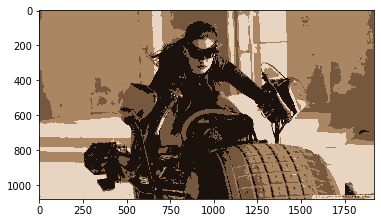

In [69]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
#plt.imshow()
plt.imshow(new_img)
plt.show()